# Baseline

This notebook allows to see the performance of the baseline model and its limitations.

***Author:*** [Paulo Ribeiro](mailto:paulo.ribeirodecarvalho@epfl.ch) 

## Import

In [1]:
import pandas as pd
from feature_extraction import load_split_image_paths, ImageVectorization
from random_forest import Classifier

## Data

Load the data and split it in train and test set. Note that no validation set is created since no time to go through a hyperparameter tuning for this coding test.

In [2]:
# Define the data path
data_path = "../data/"
categories = ["cloudy", "desert", "green_area", "water"]

train_paths, test_paths, train_labels, test_labels = load_split_image_paths(
    data_path=data_path, categories=categories, test_size=0.2
)

          0    1     2     3
train  1200  904  1200  1200
test    300  227   300   300
{'cloudy': 0, 'desert': 1, 'green_area': 2, 'water': 3}


## Feature engineering

Compute features from the images and retrieve its vectorization that will be applied later for the classifier model. I display the first 5 rows of the `train_features` variable to explicitly show the features generated.

In [3]:
# Instantiate feature extractor and transform data
vectorizer = ImageVectorization()
train_features = vectorizer.transform(train_paths, show_df=True)
test_features = vectorizer.transform(test_paths, show_df=False)

,red_mean,green_mean,blue_mean,red_std,green_std,blue_std,gray_contrast,gray_correlation,gray_energy,gray_homogeneity
0,0.468292,0.294663,-0.106416,0.238454,0.392125,0.129116,0.110301,0.784595,-0.292455,0.222720
1,-0.168097,0.993003,1.495629,0.027521,0.159622,0.300183,-0.066478,0.822438,-0.834876,-0.564176
2,-0.921608,-0.341859,-0.678831,0.057689,0.395666,0.723928,1.048109,-0.178650,-1.146855,-1.850280
3,-0.536393,-0.981109,-0.953955,-0.242768,-0.069826,0.281766,-0.262874,0.870488,0.634577,0.321824
4,2.676443,2.071291,1.653401,6.837092,6.266591,5.953890,0.006488,1.070670,0.447962,0.032585


## Train model

In [4]:
# Instantiate classifier and train
classifier = Classifier()
classifier.train(train_features, train_labels)

## Evaluate model

In [5]:
misclassified_imgs, wrong_predictions = classifier.evaluate(
    test_features, test_labels, img_paths=test_paths
)

print(f"Number of misclassified images: {len(misclassified_imgs)}")
pd.Series(wrong_predictions).value_counts()

              precision    recall  f1-score   support

      cloudy       0.90      0.99      0.94       300
      desert       1.00      0.85      0.92       227
  green_area       1.00      0.98      0.99       300
       water       0.98      0.99      0.99       300

    accuracy                           0.96      1127
   macro avg       0.97      0.96      0.96      1127
weighted avg       0.97      0.96      0.96      1127

Number of misclassified images: 42


0    34
3     7
2     1
Name: count, dtype: int64

## Limitations

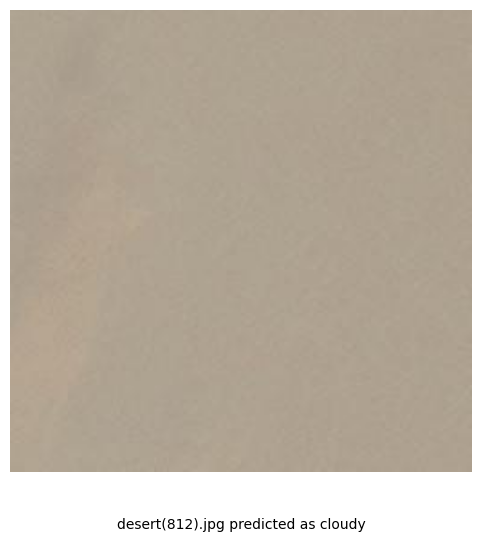

In [6]:
idx = 41
classifier.look_at_misclassified(
    misclassified_imgs=misclassified_imgs, idx=idx, wrong_predictions=wrong_predictions
)

In [7]:
misclassified_imgs.tolist()

['../data/water/SeaLake_1766.jpg',
 '../data/desert/desert(991).jpg',
 '../data/water/SeaLake_2981.jpg',
 '../data/desert/desert(992).jpg',
 '../data/desert/desert(746) (1).jpg',
 '../data/desert/desert(829).jpg',
 '../data/desert/desert(821).jpg',
 '../data/desert/desert(827).jpg',
 '../data/desert/desert(21).jpg',
 '../data/green_area/Forest_34.jpg',
 '../data/desert/desert(1013).jpg',
 '../data/desert/desert(790).jpg',
 '../data/green_area/Forest_69.jpg',
 '../data/desert/desert(806).jpg',
 '../data/green_area/Forest_87.jpg',
 '../data/desert/desert(252).jpg',
 '../data/desert/desert(823).jpg',
 '../data/desert/desert(1009) (1).jpg',
 '../data/desert/desert(909).jpg',
 '../data/green_area/Forest_1998.jpg',
 '../data/desert/desert(1024).jpg',
 '../data/cloudy/train_22967.jpg',
 '../data/desert/desert(690).jpg',
 '../data/desert/desert(764).jpg',
 '../data/cloudy/train_14667.jpg',
 '../data/desert/desert(966).jpg',
 '../data/desert/desert(816).jpg',
 '../data/desert/desert(720).jpg',
